In [79]:
import plotly.graph_objects as go
import copy
import re
import importlib


# Import BW25 packages
import bw2data as bd


In [80]:
import sys # https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
sys.path.insert(1, r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Brighway\Libaries')

In [81]:
import standards as s
import Monte_Carlo as MC
import life_cycle_assessment as lc
import LCA_plots as lp


importlib.reload(MC)
importlib.reload(lc)
importlib.reload(lp)

<module 'LCA_plots' from 'C:\\Users\\ruw\\Desktop\\RA\\Single-use-vs-multi-use-in-health-care\\Brighway\\Libaries\\LCA_plots.py'>

In [82]:
db_type = 'CONSQ'
lcia_method = 'recipe'

path = r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Brighway'



file_name = f'{path}\Results\Ananas - {db_type}_{lcia_method}.xlsx'
file_cont_name = f'{path}\Results\Ananas contribution - {db_type}_{lcia_method}.xlsx'
sheet_name = 'Ananas'

save_dir = s.results_folder(path, 'Results', 'Ofir')

path = r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Brighway'

# Your name variable should be the name of the project.
database_project = "SU_vs_MU"
database_name = "sterilization"

# flows = [f'alubox - {db_type}', f'PP sheet sc2 - {db_type}', f'PP sheet sc3 - {db_type}']
flow_legend = ['H2R',
               'H2S',
               'H4R',
               'H4S',
               'ALC',
               'ALW',
               'ASC',
               'ASW']

directory = 'C:\\Users\\ruw\\Desktop\\RA\\'

calculate_lcia = False
calculate_cont = False

Folder name Results created


In [83]:
flows = lc.get_flows(database_project, database_name, db_type)
initialization = [database_project, database_name, flows, lcia_method, db_type]

In [84]:
df, impact_category, plot_x_axis_all = lc.calculate_lcia(calculate=False, initialization=initialization, file_name=file_name, sheet_name=sheet_name)

Consequential
Recipe is selected
Initialization is completed


ValueError: not enough values to unpack (expected 3, got 2)

In [68]:
if 'recipe' in lcia_method:
    df_test, df_endpoint = lc.recipe_dataframe_split(df)
    plot_x_axis_end = plot_x_axis_all[-3:]
    ic_mid = plot_x_axis_all[:-3] 
    plot_x_axis = []
    for ic in ic_mid:
        # print(ic)
        string = re.findall(r'\((.*?)\)', ic)
        plot_x_axis.append(string[0])

else:
    df_test = df
    plot_x_axis = plot_x_axis_all


In [316]:
# # # Processing the LCA results



In [69]:
# if calculate_cont == True:
#     sub_proccess, amount = lc.obtaining_sub_process(sub_product_details)
#     FU_sub, FU_sub_process, idx = lc.sub_process_initilization(sub_proccess, FU, database_project, f'df_idx_ofir_{db_type}', lcia_method, db_type)
#     flow_count, flow_sub, functional_unit_sub = lc.FU_contibution_initilization(FU_sub, FU_sub_process)
#     fu_sub_updated = lc.process_update(FU, functional_unit_sub)
    
#     df_cont = lc.LCIA_contribution(impact_category[1], flow_count, FU_sub_process, fu_sub_updated, amount, idx)
#     lc.save_LCA_results(df_cont, file_cont_name, sheet_name, impact_category)
#     df_c = lc.import_LCA_results(file_cont_name, idx, impact_category[1])


In [70]:
df_tot, df_scaled = lc.dataframe_element_scaling(df_test)


In [71]:
df_col = [df_test.columns[1]]
df_GWP = df_test[df_col]

# unique_elements = lc.unique_elements_list(df_GWP, db_type)
# colors = plot_colors(temp_lst,'cool')
colors = [
    '#1f77b4',  # Muted Blue
    '#ff7f0e',  # Vivid Orange
    '#2ca02c',  # Fresh Green
    '#d62728',  # Bold Red
    '#9467bd',  # Subtle Purple
    '#8c564b',  # Warm Brown
    '#e377c2',  # Soft Pink
    '#7f7f7f',  # Neutral Gray
    '#bcbd22',  # Sunny Yellow
    '#17becf'   # Bright Cyan
]

inputs = [flow_legend, colors, save_dir, db_type, database_name]


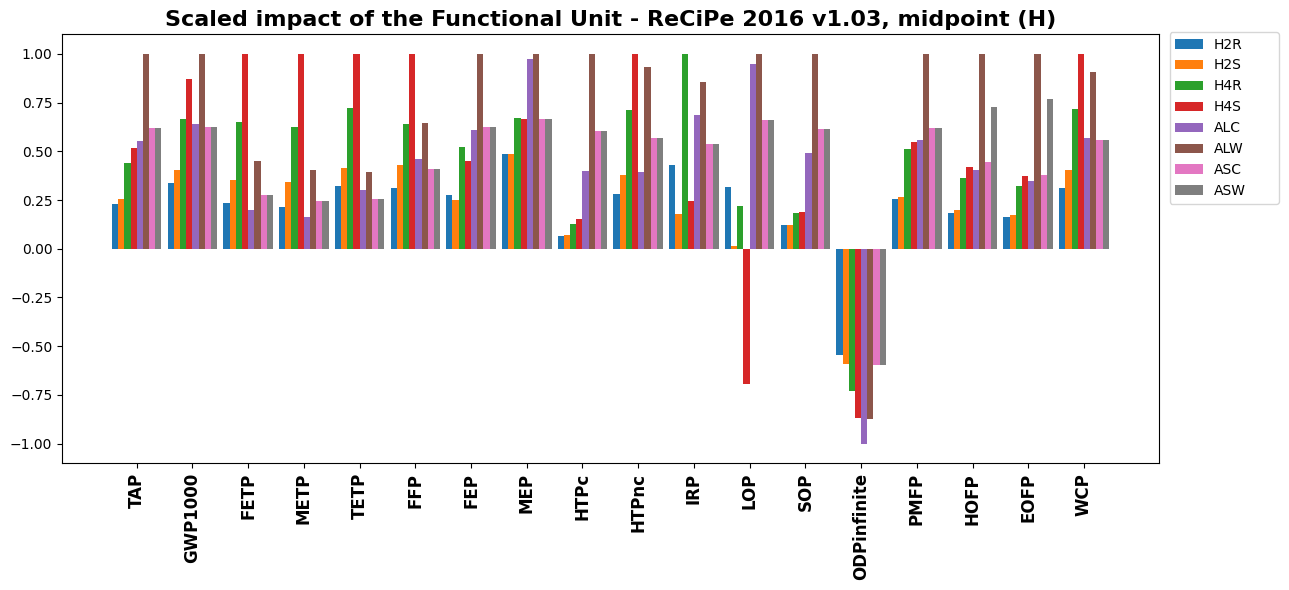

In [321]:
leg_pos_mid = .605

lp.scaled_FU_plot(df_scaled, plot_x_axis, inputs, impact_category, leg_pos_mid)

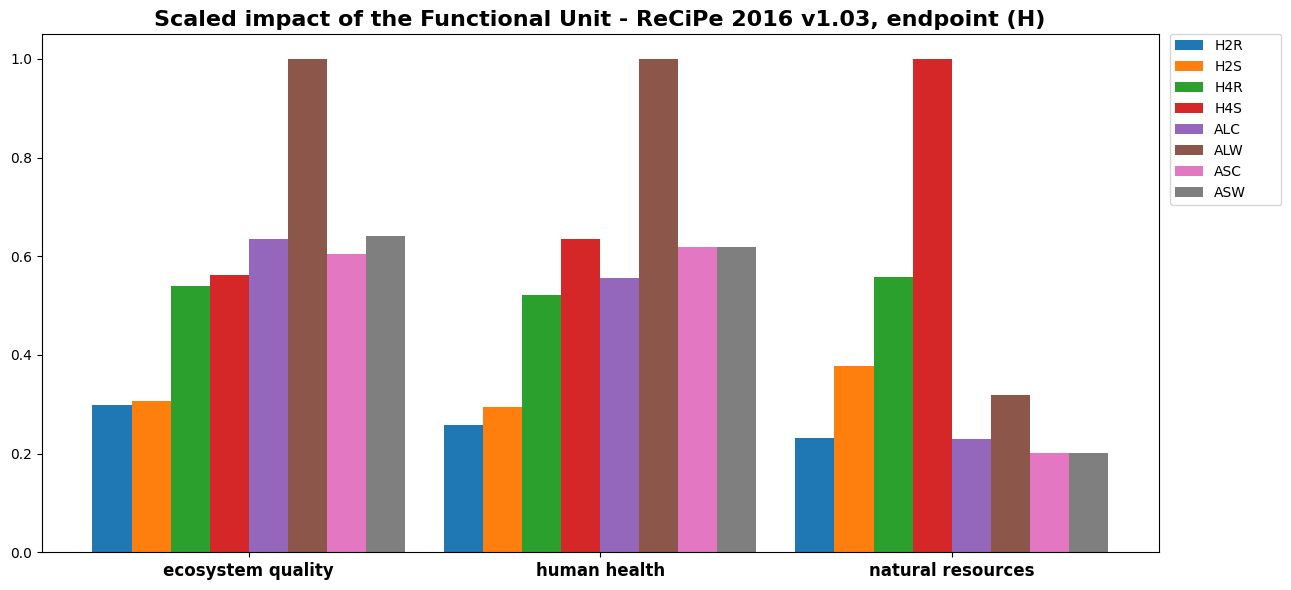

In [322]:
leg_pos_end = 0.67
if 'recipe' in lcia_method.lower():
    df_tot_e, df_scaled_e = lc.dataframe_element_scaling(df_endpoint)
    lp.scaled_FU_plot(df_scaled_e, plot_x_axis_end, inputs, impact_category[-3:], leg_pos_end)


In [323]:
if 'recipe' not in lcia_method:
    lp.single_score_plot(directory, df_tot, colors, flow_legend, save_dir, db_type)

In [324]:
# Categories definitions
categories, category_mapping = lp.category_organization(database_name)
# 
y_min = -0.5
y_max = 1.5
step = 0.1
y_axis_values = [y_min, y_max, step]

# lp.gwp_lc_plot(df_GWP, category_mapping, categories, inputs, y_axis_values)

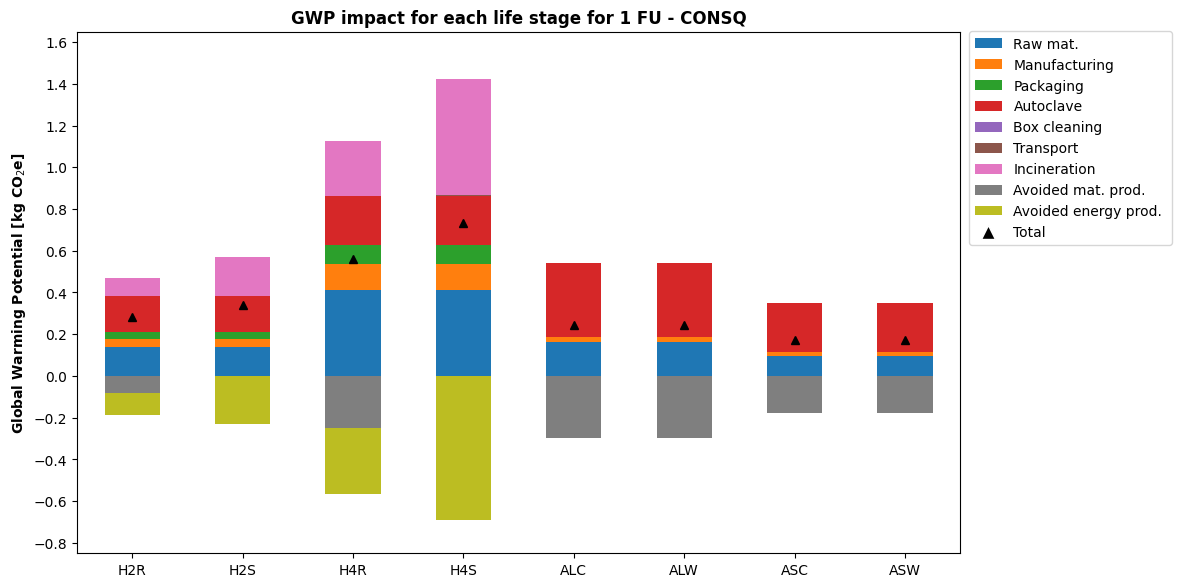

In [325]:
lp.gwp_scenario_plot(df_GWP, inputs)

In [ ]:
def node_name_update(node):
    if '- APOS - sc 1' in node:
        node = node.replace(f' - APOS - sc 1', '')
        if  'avoided alubox raw materials' in node:
            node = 'Avoided raw mat.'
        elif 'melting' in node:
            node = 'Melting'
        elif 'mixed sorting' in node:
            node = 'Mixed sorting'
        elif 'prod' in node:
            node = 'Alubox prod.'
        else:
            node = node.title()
    elif 'wrought alloy' in node:
        node = 'Virgin alu'
    elif 'steel production' in node:
        node = 'Virgin steel'
    elif 'impact extrusio' in node:
        node = 'Alu impact extrusion'
    elif 'corrugated' in node:
        node = 'Cardboard box'
    elif 'anodising' in node:
        node = 'Alu anodising'
    elif 'transport' in node:
        node = 'Transport'
    
    return node

In [ ]:
def source_name_update(process, source):
        
    if 'wrought alloy' in source:
        source = 'Alu wrought alloy'
    elif 'steel production' in source:
        source = 'Virgin steel'
    elif 'anodising' in source:
        source = 'Alu anodising'
    elif 'impact extrusio' in source:
        source = 'Alu impact extrusion'
    elif 'transport' in source:
        source = 'Transport'
    elif 'corrugated' in source:
        source = 'Cardboard box'
    elif 'metal working' in source:
        source = 'Steel manufacturing'
    elif 'sheet rolling' in source:
        source = 'Alu sheet rolling'
    elif 'recycling' in source:
        if 'mixed sorting' in process.lower():
            source = 'Mixed metal scrap'
        else:
            source = 'Alu remelting'
    elif 'autoclave' in source:
        source = 'Autoclave'
    elif 'Handwash' in source:
        source = 'Handwash'
    return source

In [ ]:
# df_c_gwp =copy.deepcopy(df_c)
# c = []

# node_sc1 = ['Raw material','Production', 'Use', 'EoL', 'EoL Treatment']
# node_sc2 = []
# node_sc3 = []

# links_sc1 = []
# links_sc2 = []
# links_sc3 = []

# for i, row in df_c_gwp.iterrows():
#     if 'sc 1' in i:
#         # print(i)
#         node = node_name_update(i)
#         # if  'disinfec' not in i:
#         node_sc1.append(node)
#         for element in row:

#             for proc in element:
#                 # print(proc)
#                 val = round(proc[1]/GWP_value[0][-1]*100,2)
#                 source = proc[0]
#                 source = source_name_update(i,source)
#                 # print(source)
#                 if   val != 0:

#                     if  val < 0 and 'Cardboard' not in source:
#                         # print(proc[0])
#                         source = 'Avoided ' + source.lower()

#                     if 'raw material' in i and 'avoided' not in source.lower():
#                         print(f'{i} : Raw : {node}, source : {source}, GWP : {val}')
#                         dct_temp = {"source": 'Raw material', "target": source, "value":val}
#                         dct_temp2 = {"source": source, "target": 'Production', "value":val}
#                         # dct_temp3 = {"source": node, "target": 'Production', "value":val}
#                     if 'production' in i or 'transport' in source.lower():
#                         print(f'{i} : Prod. : {node}, source : {source}, GWP : {val}')
#                         dct_temp = {"source": 'Production', "target": source, "value":val}
#                         dct_temp2 = {"source": source, "target": 'Use', "value":val}
#                         # dct_temp3 = {"source": node, "target": 'Use', "value":val}
#                     if 'autoclave' in i.lower() or 'handwash' in i.lower():
#                         print(f'{i} : Use : {node}, source : {source}, GWP : {val}')
#                         dct_temp = {"source": 'Use', "target": source, "value": val}
#                         dct_temp2 = {"source": source, "target": 'EoL', "value": val}
#                     if  'avoided' in i.lower():
                        
#                         if 'alu' in source.lower():
#                             val = round(val * 0.95, 2) 
#                         elif 'steel' in source.lower():
#                             val = round(val * 0.65, 2) 
#                         print(f'{i} : EoL : {node}, source : {source}, GWP : {val}')
#                         dct_temp = {"source": 'EoL', "target": source, "value":val}
#                         dct_temp2 = {"source": source, "target": node, "value":val}
#                     if 'eol' in i.lower() and 'avoided' not in i.lower():
#                         print(f'{i} : EoL : {node}, source : {source}, GWP : {val}')
#                         dct_temp = {"source": 'EoL', "target": source, "value":val}
#                         dct_temp2 = {"source": source, "target": 'EoL Treatment', "value":val}

                
#                     links_sc1.append(dct_temp)
#                     links_sc1.append(dct_temp2)
#                     # if dct_temp3 not in links_sc1:
#                     #     links_sc1.append(dct_temp3)
#                     node_sc1.append(source)


In [ ]:
colors

[(0.18995, 0.07176, 0.23217, 1.0),
 (0.24539, 0.23044, 0.59142, 1.0),
 (0.27334, 0.38008, 0.84037, 1.0),
 (0.27381, 0.52069, 0.97899, 1.0),
 (0.21382, 0.65886, 0.97959, 1.0),
 (0.11639, 0.7974, 0.85559, 1.0),
 (0.10342, 0.896, 0.715, 1.0),
 (0.23449, 0.96065, 0.55614, 1.0),
 (0.44321, 0.99551, 0.37345, 1.0),
 (0.64362, 0.98999, 0.23356, 1.0),
 (0.78563, 0.93579, 0.20336, 1.0),
 (0.90605, 0.84337, 0.22188, 1.0),
 (0.98, 0.73, 0.22161, 1.0),
 (0.99593, 0.58703, 0.16899, 1.0),
 (0.96187, 0.41093, 0.0931, 1.0),
 (0.89298, 0.26981, 0.03993, 1.0),
 (0.79125, 0.16368, 0.01387, 1.0),
 (0.65345, 0.07902, 0.00408, 1.0),
 (0.4796, 0.01583, 0.01055, 1.0)]

In [ ]:
color_links = []
color_nodes = []
for c in colors:
    c_link = list(c)  # Convert tuple to list if needed
    c_node = list(c)

    c_link = f"rgba({c[0]}, {c[1]}, {c[2]}, .5)"  # Update the last element
    c_node = f"rgba({c[0]}, {c[1]}, {c[2]}, 1)"

    color_links.append(c_link)  # Add the updated list to c_new
    color_nodes.append(c_node)

c_node

'rgba(0.4796, 0.01583, 0.01055, 1)'

In [ ]:
sankey_color = colors



In [ ]:
list(sankey_color[0])

[0.18995, 0.07176, 0.23217, 1.0]

In [ ]:
len(color_nodes)

19

In [ ]:
df_c_gwp =copy.deepcopy(df_c)
c = []

node_sc1 = ['Raw material','Production', 'Use', 'EoL', 'EoL Treatment']
node_sc2 = []
node_sc3 = []



links_sc1 = []
links_sc2 = []
links_sc3 = []

node_colors_links = {}
node_colors = {}

link_opacity = 0.3
node_opacity = 0.9

pos = -3
neg = 6

for i, c in enumerate(node_sc1):
    node_colors_links[c] =color_links[pos]
    if i == 0:
        node_colors[c] = color_nodes[i+1]
    else:
        node_colors[c] = color_nodes[i+4]

for i, row in df_c_gwp.iterrows():
    if 'sc 1' in i:
        # print(i)
        node = node_name_update(i)
        # if  'disinfec' not in i:
        node_sc1.append(node)
        for element in row:

            for proc in element:
                # print(proc)
                val = round(proc[1]/GWP_value[0][-1]*100,2)
                source = proc[0]
                source = source_name_update(i,source)
                # print(source)
                if   val != 0:
                    node_colors_links[source] = color_links[pos]
                    if  val < 0 and 'Cardboard' not in source:
                        # print(proc[0])
                        source = 'Avoided ' + source.lower()

                        node_colors_links[source] = color_links[neg]

                    if 'raw material' in i and 'avoided' not in source.lower():
                        print(f'{i} : Raw : {node}, source : {source}, GWP : {val}')
                        dct_temp = {"source": 'Raw material', "target": source, "value":val}
                        dct_temp2 = {"source": source, "target": 'Production', "value":val}
                        # dct_temp3 = {"source": node, "target": 'Production', "value":val}
                        node_colors[source] = color_nodes[2]
                        node_colors[node] = color_nodes[0]

                    if 'production' in i or 'transport' in source.lower():
                        print(f'{i} : Prod. : {node}, source : {source}, GWP : {val}')
                        dct_temp = {"source": 'Production', "target": source, "value":val}
                        dct_temp2 = {"source": source, "target": 'Use', "value":val}
                        # dct_temp3 = {"source": node, "target": 'Use', "value":val}
                        node_colors[source] = color_nodes[5]
                        node_colors[node] = color_nodes[6]

                    if 'autoclave' in i.lower() or 'handwash' in i.lower():
                        print(f'{i} : Use : {node}, source : {source}, GWP : {val}')
                        dct_temp = {"source": 'Use', "target": source, "value": val}
                        dct_temp2 = {"source": source, "target": 'EoL', "value": val}
                        node_colors[source] = color_nodes[4]
                        node_colors[node] = color_nodes[3]
                        
                    if  'avoided' in i.lower():
                        if 'alu' in source.lower():
                            val = round(val * 0.95, 2) 
                        elif 'steel' in source.lower():
                            val = round(val * 0.65, 2) 
                        print(f'{i} : EoL : {node}, source : {source}, GWP : {val}')
                        dct_temp = {"source": 'EoL', "target": source, "value":val}
                        dct_temp2 = {"source": source, "target": node, "value":val}
                        node_colors[source] = color_nodes[13]
                        node_colors[node] = color_nodes[11]
                        
                    if 'eol' in i.lower() and 'avoided' not in i.lower():
                        print(f'{i} : EoL : {node}, source : {source}, GWP : {val}')
                        dct_temp = {"source": 'EoL', "target": source, "value":val}
                        dct_temp2 = {"source": source, "target": 'EoL Treatment', "value":val}
                        node_colors[source] = color_nodes[13]
                        node_colors[node] = color_nodes[11]
                
                    links_sc1.append(dct_temp)
                    links_sc1.append(dct_temp2)
                    # if dct_temp3 not in links_sc1:
                    #     links_sc1.append(dct_temp3)
                    node_sc1.append(source)


NameError: name 'GWP_value' is not defined

In [ ]:
len(colors)

15

In [ ]:

# Create a Sankey diagram
fig = go.Figure()

# Calculate the scale factor for link thickness and node size
max_value = max(abs(link['value']) for link in links_sc1)
scale_factor = 1  # You can adjust this factor to control the scaling

# Calculate total outflow for each node and round to 2 decimals
outflow_totals = {node: round(sum(link['value'] for link in links_sc1 if link['source'] == node), 2) for node in node_sc1}

# Calculate total inflow for each node and round to 2 decimals
inflow_totals = {node: round(sum(link['value'] for link in links_sc1 if link['target'] == node), 2) for node in node_sc1}

# Determine if a node has only incoming flows
incoming_only = {node: inflow_totals[node] > 0 and outflow_totals[node] == 0 for node in node_sc1}

# Calculate y-coordinates for nodes based on total outflow or inflow
node_y_coordinates = [sum(inflow_totals[node] if incoming_only[node] else outflow_totals[node] for node in node_sc1[:i]) for i in range(len(node_sc1))]
incoming_only['Avoided raw mat.'] = True
incoming_only['EoL Treatment'] = True
# incoming_only['Avoided chromium steel'] = True

# Add links
fig.add_trace(go.Sankey(
    node=dict(
        pad=50,
        thickness=10,
        line=dict(width=[abs(link['value']) / max_value * scale_factor for link in links_sc1]),
        label=[f"{node}<br>{inflow_totals[node] if incoming_only[node] else outflow_totals[node]}%" for node in node_sc1],
        color=[node_colors[node] for node in node_sc1],
    ),
    link=dict(
        source=[node_sc1.index(link['source']) for link in links_sc1],
        target=[node_sc1.index(link['target']) for link in links_sc1],
        value=[abs(link['value']) for link in links_sc1],
        color=[node_colors_links[link['source']] for link in links_sc1],  # Use source node color for links
        line=dict(width=[abs(link['value']) / max_value * scale_factor for link in links_sc1]),
    ),
    arrangement="perpendicular",
    domain=dict(x=[0, 1], y=[0, 1]),
))


# Show the figure
fig.show()
# fig.write_image("Sankey_alubox_consq.jpg")
